In [ ]:
"""
Siehe Dateien unter MAPLE-main.

- Mit Hilfe von "createMapleFile.py" eine Fasta-File in eine Maple-File umschreiben.

- Dann folgenden Befehl in Kommandozeile nutzen, für ML Ergebnis des Baumes:

    pypy3 MAPLEv0.3.1.py --input inputMapleFile.txt

    oder

    python MAPLEv0.3.1.py --input inputMapleFile.txt

    ACHTUNG: Der Pfad "--output" ist hardgecoded, da sonst Fehler mit Argument in Kommandozeile

"""

In [ ]:
"""
Der fertige Baum kann auf ITOL hochgeladen werden. 
Ergebnis: https://itol.embl.de/tree/9590244210266761678625161
"""

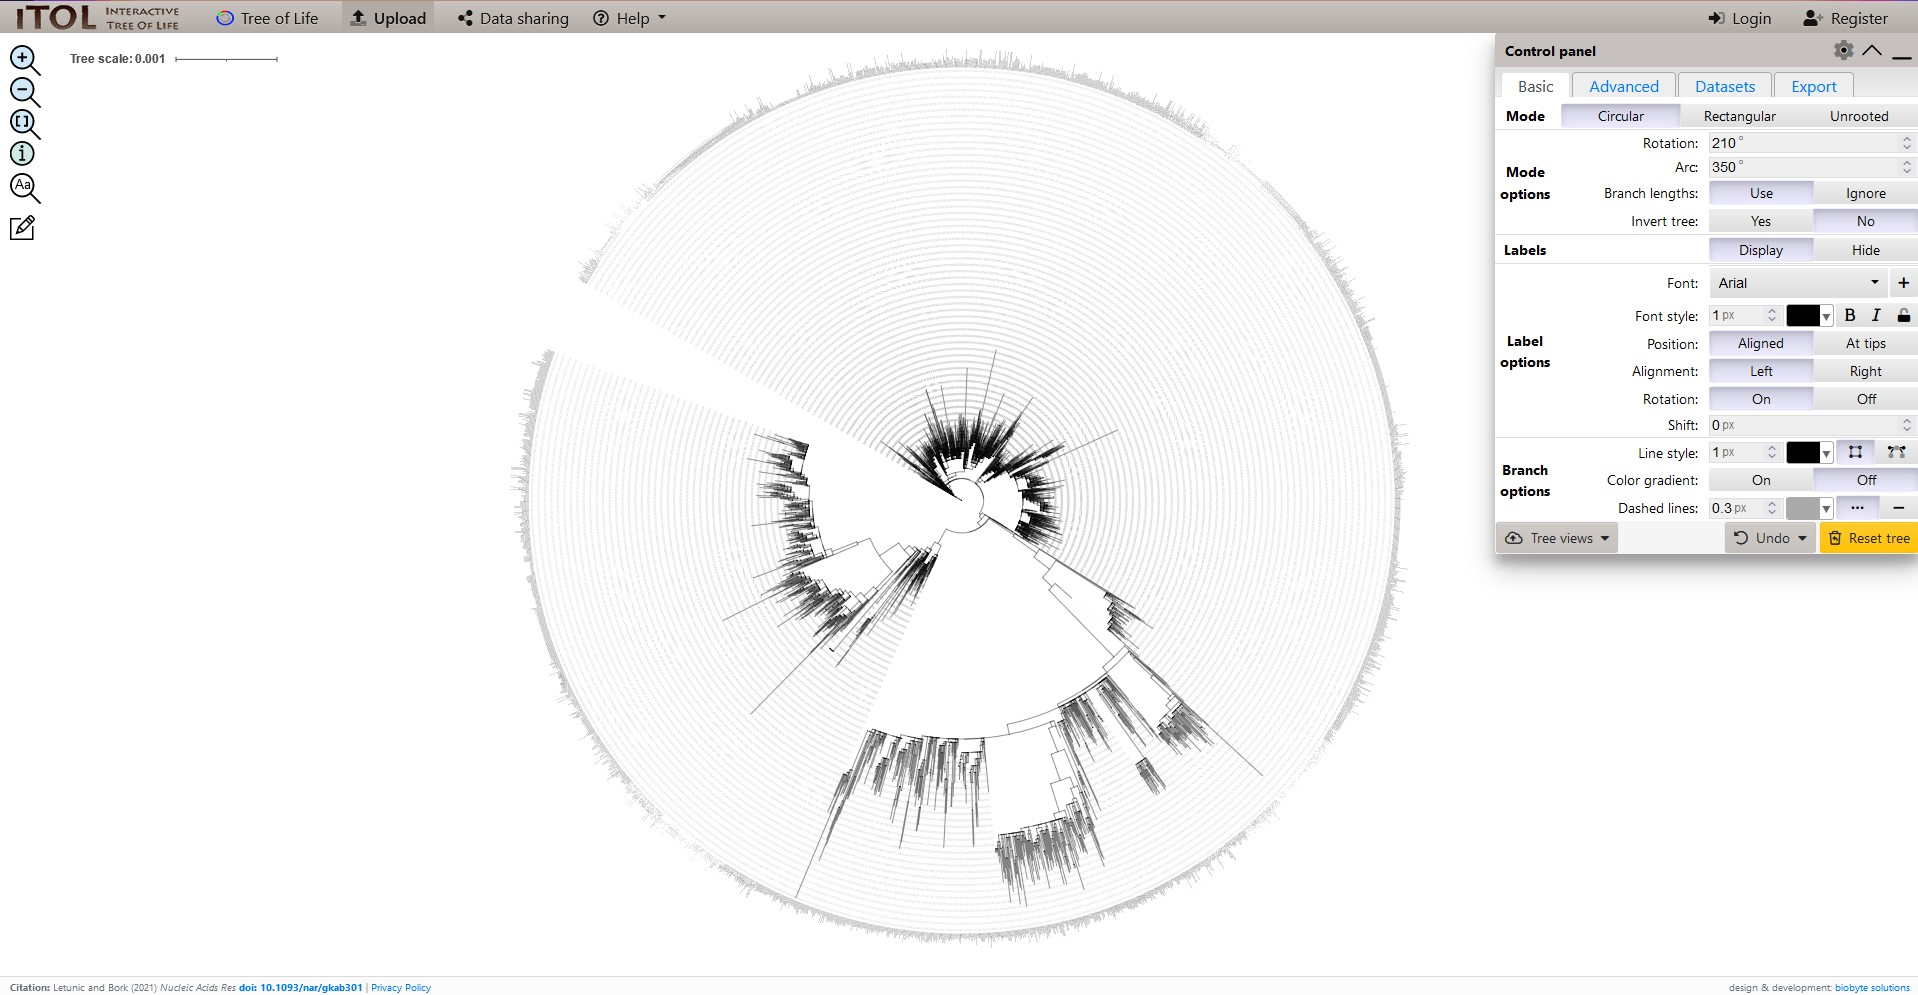

In [20]:
#Anmerkung: Das Ergebnis mit MAPLE ist deutlich besser (verbreitetere Verwandschaftsverhältnisse) als in BioPhylo NJ

In [ ]:
#Eigene Baumvisualisierungs-Versuche folgend, Datei: "MAPLE_output_tree.tree"

In [3]:
import Bio.Phylo as Phylo

In [17]:
tree = Phylo.read("MAPLE-main\\files\\MAPLE_output_tree.tree", "newick")
tree.ladderize() #Deeper Clades are displayed on top

In [24]:
Phylo.draw_ascii(tree)

 , USA/SD-SDAIHG-1949/2022
 |
 , USA/NE-CDC-LC0933135/2022
_|
 | , USA/CA-CDC-STM-WUCNNPYRK/2022
 |_|
 | , USA/KS-CDC-QDX45132671/2022
 | |
 | | ZAF/NHLS-UCT-PA-J114/2022
 |
 |_ USA/PA-CDC-QDX43329870/2022
 |
 |, OX384643
 ||
 ,, USA/CO-CDC-QDX44243561/2022
 ||
 || USA/VA-CDC-QDX44165834/2022
 ||
 |, OX358395
 ||
 ||_ Liechtenstein/FL-Risch-1031R14458/2022
 |
 , England/LSPA-32583070/2022
 |
 |_ Japan/SZ-NIG-Y222088/2022
 |
 |_ USA/22-024950-WGS-02/2022
 |
 , Switzerland/VD-CHUV-GEN13368/2022
 |
 |__ Liechtenstein/FL-Risch-1115R14745/2022
 |
 |, Scotland/QEUH-325E1FA0/2022
 ,|
 ||_ IMS-10013-CVDP-A68AD12C-E5B6-4838-9F1...
 |
 |_ OX344059
 |
 |, Liechtenstein/FL-Risch-0924R13829/2022
 ||
 |, THA/CONI-3802/2022
 ||
 |, USA/WV-CDC-LC0900913/2022
 ||
 || USA/DC-CDC-LC0888861/2022
 |
 |_ USA/WI-CDC-QDX41593511/2022
 |
 |, USA/PA-CDC-STM-5WM5F7XKG/2022
 ,|
 || USA/CO-CDC-STM-9WJWY4F6B/2022
 |
 |, OX403703
 ||
 ||_ OX376096
 ,|
 |, Japan/SZ-NIG-Y221896/2022
 ||
 || Japan/SZ-NIG-Y222019/2022
 

In [47]:
#Den Baum in Networkx übertragen für ein paar Analysen
import networkx as nx
net = Phylo.to_networkx(tree)
nx.is_tree(net)
len(list(net.nodes))

5861

In [185]:
#Fokussieren wir uns auf die Samples aus Thailand
selection_THA = []
for i in list(net.nodes):
    if "THA" in str(i):
        selection_THA.append(i)

In [194]:
#Fokussieren wir uns auf die Samples aus China
selection_China = []
for i in list(net.nodes):
    if "China" in str(i):
        selection_China.append(i)

In [195]:
#Get deepeste node aus einer Selektion
def getDeepestNode(nds):
    tmax = 0
    output = list(nds)[0]
    
    for i in list(nds):
        if i.branch_length>tmax:
            output = i
            tmax = i.branch_length
            
    return output, tmax

In [199]:
print(getDeepestNode(net.nodes))
#Ergebnis für tiefsten Knoten ist "USA/TX-CDC-QDX43116878/2022", das passt mit visuellem Ergebnis oben bei "draw_ascii"

(Clade(branch_length=0.0014150421205966594, name='USA/TX-CDC-QDX43116878/2022'), 0.0014150421205966594)


In [197]:
print(getDeepestNode(selection_THA))

(Clade(branch_length=0.00034220417834832865, name='THA/CONI-1215/2021'), 0.00034220417834832865)


In [198]:
print(getDeepestNode(selection_China))

(Clade(branch_length=3.363499890274387e-05, name='China/UN-UHB-USB_2022_11_30_46d59938/2022'), 3.363499890274387e-05)
